# 1. Import All Required Packages

In [1]:
# Import libraries# Impor 
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

import keras

from keras.utils import np_utils

from keras import backend as K

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.preprocessing.image import ImageDataGenerator

D:\python\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\python\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# 2.Read Images from the data path

In [102]:
input_img.shape

(256, 256, 3)

In [91]:
#Define Datapath
data_path = './jaffe/'
data_dir_list = os.listdir(data_path)
#data_dir_list = ['ANGRY', 'DISGUST', 'FEAR', 'HAPPY', 'NEUTRAL', 'SAD', 'SURPRISE']

img_cols=256
num_channel=1

num_epoch=10

img_data_list=[]


for dataset in data_dir_list:
    #img_list is a subgroup of dataset
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img_resize=cv2.resize(input_img,(128,128))
        #img_data_list contains the resize of 213 images of different subdatasets
        img_data_list.append(input_img_resize)
        
img_data = np.array(img_data_list)
img_data.shape
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

Loaded the images of dataset-ANGRY

Loaded the images of dataset-DISGUST

Loaded the images of dataset-FEAR

Loaded the images of dataset-HAPPY

Loaded the images of dataset-NEUTRAL

Loaded the images of dataset-SAD

Loaded the images of dataset-SURPRISE



(213, 128, 128, 3)

# 3.Define the number of classes

In [3]:
num_classes = 7

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:29]=0 #30
labels[30:59]=1 #29
labels[60:92]=2 #32
labels[93:124]=3 #31
labels[125:155]=4 #30
labels[156:187]=5 #31
labels[188:]=6 #30

names = ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE']

def getLabel(id):
    return ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE'][id]

In [100]:
num_classes

7

# 4.Convert the class label to one-hot encoding

In [4]:
# convert class labels to on-hot encoding# conve 
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=2)

In [59]:
X_train.shape

(181, 128, 128, 3)

In [66]:
type(X_train)

numpy.ndarray

In [60]:
X_test.shape

(32, 128, 128, 3)

In [61]:
y_train.shape


(181, 7)

In [62]:
y_test.shape

(32, 7)

In [68]:
type(y_test)

numpy.ndarray

# 5. CNN Layer Set

In [49]:
# Defining the model
from keras.layers import Conv2D, MaxPooling2D

input_shape=img_data[0].shape

model = Sequential()

#new Code
model.add(Conv2D(6, kernel_size =(5, 5),  input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, kernel_size =(5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# model.add(Conv2D(120, (5, 5)))
# model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(84))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Classification
# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes))
# model.add(Activation('softmax'))

#Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

# 6.View Model Confifuration

In [50]:
model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape
model.layers[0].output_shape
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 124, 124, 6)       456       
_________________________________________________________________
activation_60 (Activation)   (None, 124, 124, 6)       0         
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 62, 62, 6)         0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 58, 58, 16)        2416      
_________________________________________________________________
activation_61 (Activation)   (None, 58, 58, 16)        0         
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 29, 29, 16)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 29, 29, 16)        0         
__________

True

In [51]:
from keras import callbacks
filename='model_train_new.csv'
filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"

csv_log=callbacks.CSVLogger(filename, separator=',', append=False)
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [csv_log,checkpoint]
callbacks_list = [csv_log]

# 7. Train Model

In [52]:
# Training
hist = model.fit(X_train, y_train, batch_size=7, nb_epoch=30, verbose=1, validation_data=(X_test, y_test),callbacks=callbacks_list)

D:\python\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 181 samples, validate on 32 samples
Epoch 1/30
181/181 [==============================] - 14s 78ms/step - loss: 2.0053 - acc: 0.0884 - val_loss: 1.9419 - val_acc: 0.2813
Epoch 2/30
181/181 [==============================] - 7s 41ms/step - loss: 1.9177 - acc: 0.2928 - val_loss: 1.9555 - val_acc: 0.1250
Epoch 3/30
181/181 [==============================] - 7s 39ms/step - loss: 1.8732 - acc: 0.2099 - val_loss: 1.8358 - val_acc: 0.2500
Epoch 4/30
181/181 [==============================] - 7s 41ms/step - loss: 1.8014 - acc: 0.3204 - val_loss: 1.7572 - val_acc: 0.3125
Epoch 5/30
181/181 [==============================] - 7s 41ms/step - loss: 1.6339 - acc: 0.4033 - val_loss: 1.6795 - val_acc: 0.3438
Epoch 6/30
181/181 [==============================] - 7s 41ms/step - loss: 1.5072 - acc: 0.4254 - val_loss: 1.6455 - val_acc: 0.3750
Epoch 7/30
181/181 [==============================] - 7s 40ms/step - loss: 1.3794 - acc: 0.4917 - val_loss: 1.4022 - val_acc: 0.5313
Epoch 8/30
181/181 [===

In [53]:
#Model Save
model.save_weights('model_weights.h5')
model.save('model_keras.h5')

<Figure size 432x288 with 0 Axes>

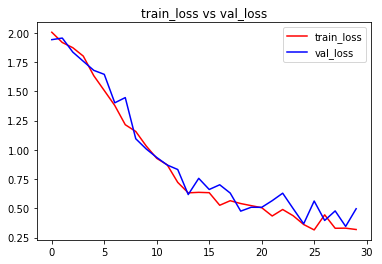

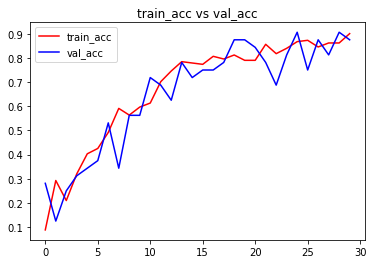

<Figure size 432x288 with 0 Axes>

In [54]:
# visualizing losses and accuracy
%matplotlib inline

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

Test Loss: 0.49689340591430664
Test accuracy: 0.875
(1, 128, 128, 3)
[[3.2469809e-05 6.3693287e-06 9.4465457e-04 1.5038133e-04 9.9364823e-01
  4.4901416e-04 4.7688447e-03]]
[4]
[[0. 0. 0. 0. 1. 0. 0.]]


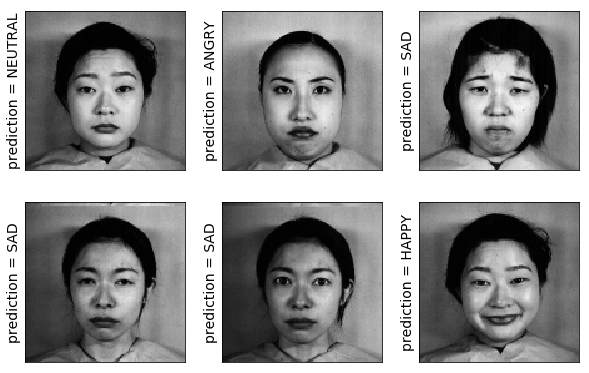

In [110]:
# Evaluating the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[0:1])

res = model.predict_classes(X_test[:6])
plt.figure(figsize=(10, 10))

for i in range(0,6):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_test[i],cmap=plt.get_cmap('gray'))
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel('prediction = %s' % getLabel(res[i]), fontsize=14)
# show the plot
plt.show()


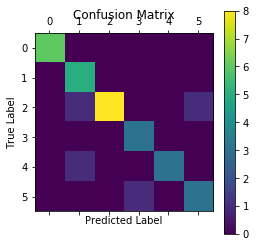

In [111]:
from sklearn.metrics import confusion_matrix
results = model.predict_classes(X_test)
cm = confusion_matrix(np.where(y_test == 1)[1], results)
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

test image original shaape (128, 128, 3)
image original shaape (128, 128, 3)


Text(0.5,0,'prediction = ANGRY')

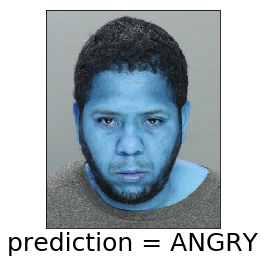

In [103]:
testimg_data_list=[]
test_img=cv2.imread('men.jpg', True)
    
test_img_resize=cv2.resize(test_img,(128,128))
testimg_data_list.append(test_img_resize)
testimg_data = np.array(testimg_data_list)
testimg_data = testimg_data.astype('float32')
testimg_data = testimg_data/255
testimg_data.shape

print("test image original shaape",testimg_data[0].shape)
print("image original shaape",img_data[0].shape)

results = model.predict_classes(testimg_data)
plt.imshow(test_img,cmap=plt.get_cmap('Set2'))
plt.gca().get_xaxis().set_ticks([])
plt.gca().get_yaxis().set_ticks([])
plt.xlabel('prediction = %s' % getLabel(results[0]), fontsize=25)
